# Skin Cancer Detection using CNN
A CNN based model which can accurately detect melanoma.

Imort all the neccessary Modules

In [2]:
import pandas as pd
import numpy as np
import tensorflow
import tensorflow.keras 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout



## Dataset

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3


In [4]:
dataset = tensorflow.keras.preprocessing.image_dataset_from_directory(
    "skin cancer/Train",
    shuffle=True,
    seed = 123,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 2239 files belonging to 9 classes.


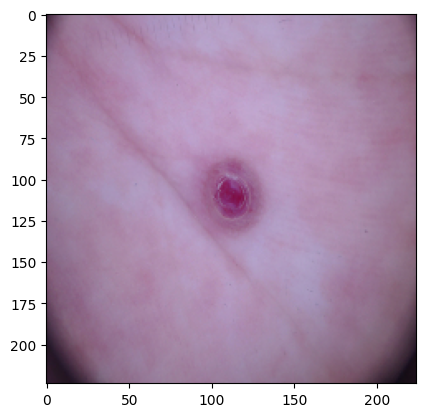

In [5]:
for image_batch ,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    

In [6]:
class_names = dataset.class_names

In [7]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [8]:
len(dataset)

70

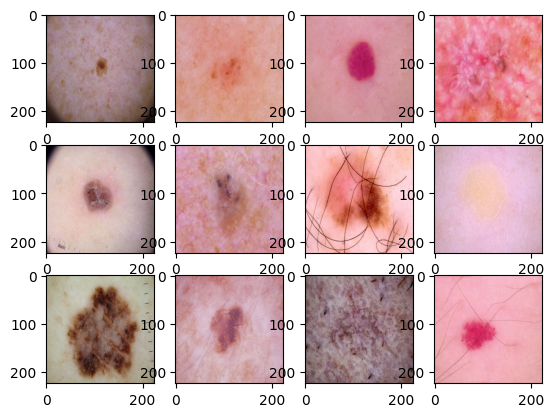

In [9]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        

## Train Test split of the Dataset 
Training data -> 80%
 Validation data->10%
 Test Data -> 10 %
 training -> 0.8
 val -> 0.1
 test ->0.1

In [10]:
len(dataset)*0.8


56.0

In [11]:
len(dataset)*0.1

7.0

In [12]:
train_ds = dataset.take(56)

In [13]:
test_ds = dataset.skip(56)

In [14]:
val_ds = test_ds.take(7)

In [15]:
test_ds = test_ds.skip(7)

In [16]:
len(test_ds)

7

In [17]:
len(val_ds)

7

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tensorflow.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tensorflow.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tensorflow.data.AUTOTUNE)

In [19]:
from tensorflow.keras import layers

In [20]:
resize_and_rescale = tensorflow.keras.Sequential([

    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1./255)
    
])

In [21]:
data_augmentation = tensorflow.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    
])

In [22]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tensorflow.data.AUTOTUNE)

## Model Building and Training


In [23]:
model = Sequential()

In [24]:
model.add(resize_and_rescale)
model.add(data_augmentation)

In [25]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 9

In [26]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (input_shape)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(layers.Flatten()),
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(n_classes,activation='softmax'))

model.compile(optimizer='adam',loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

model.build(input_shape=input_shape)




C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 18432)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 128)                   │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 9)                     │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,601,417 (9.92 MB)

 Trainable params: 2,601,417 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    train_ds,
    epochs = 25,
    batch_size=BATCH_SIZE,
    verbose = 1,
    validation_data=val_ds
    
)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.1788 - loss: 2.0872 - val_accuracy: 0.3214 - val_loss: 1.9178
Epoch 2/25
50/56 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.3166 - loss: 1.8335 

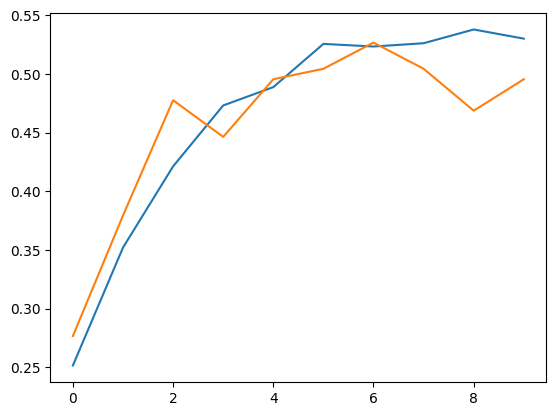

In [33]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])


In [34]:
model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

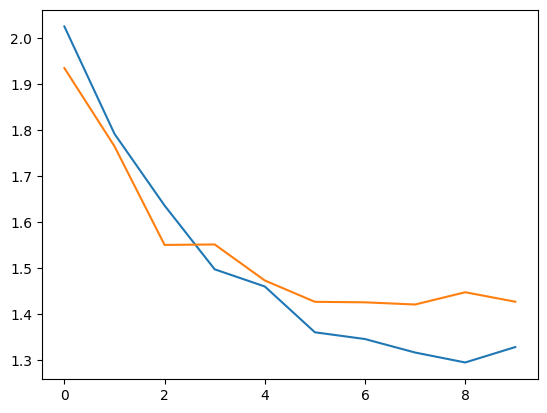

In [35]:

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

vascular lesion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[6.3148231e-10 4.9822011e-06 7.3169367e-08 3.9905663e-05 1.2061646e-05
 1.4879225e-03 1.3907093e-09 1.0453133e-06 9.9845397e-01]
8


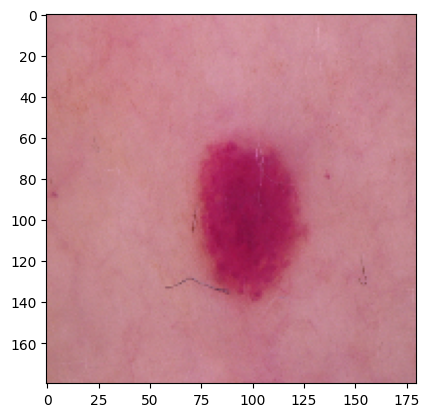

In [52]:
for image_batch ,label_batch in test_ds.take(1):
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        print(class_names[label_batch[0]])
        batch_prediction = model.predict(image_batch)
        print(batch_prediction[0])
        print(np.argmax(batch_prediction[0]))
        


In [ ]:
# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


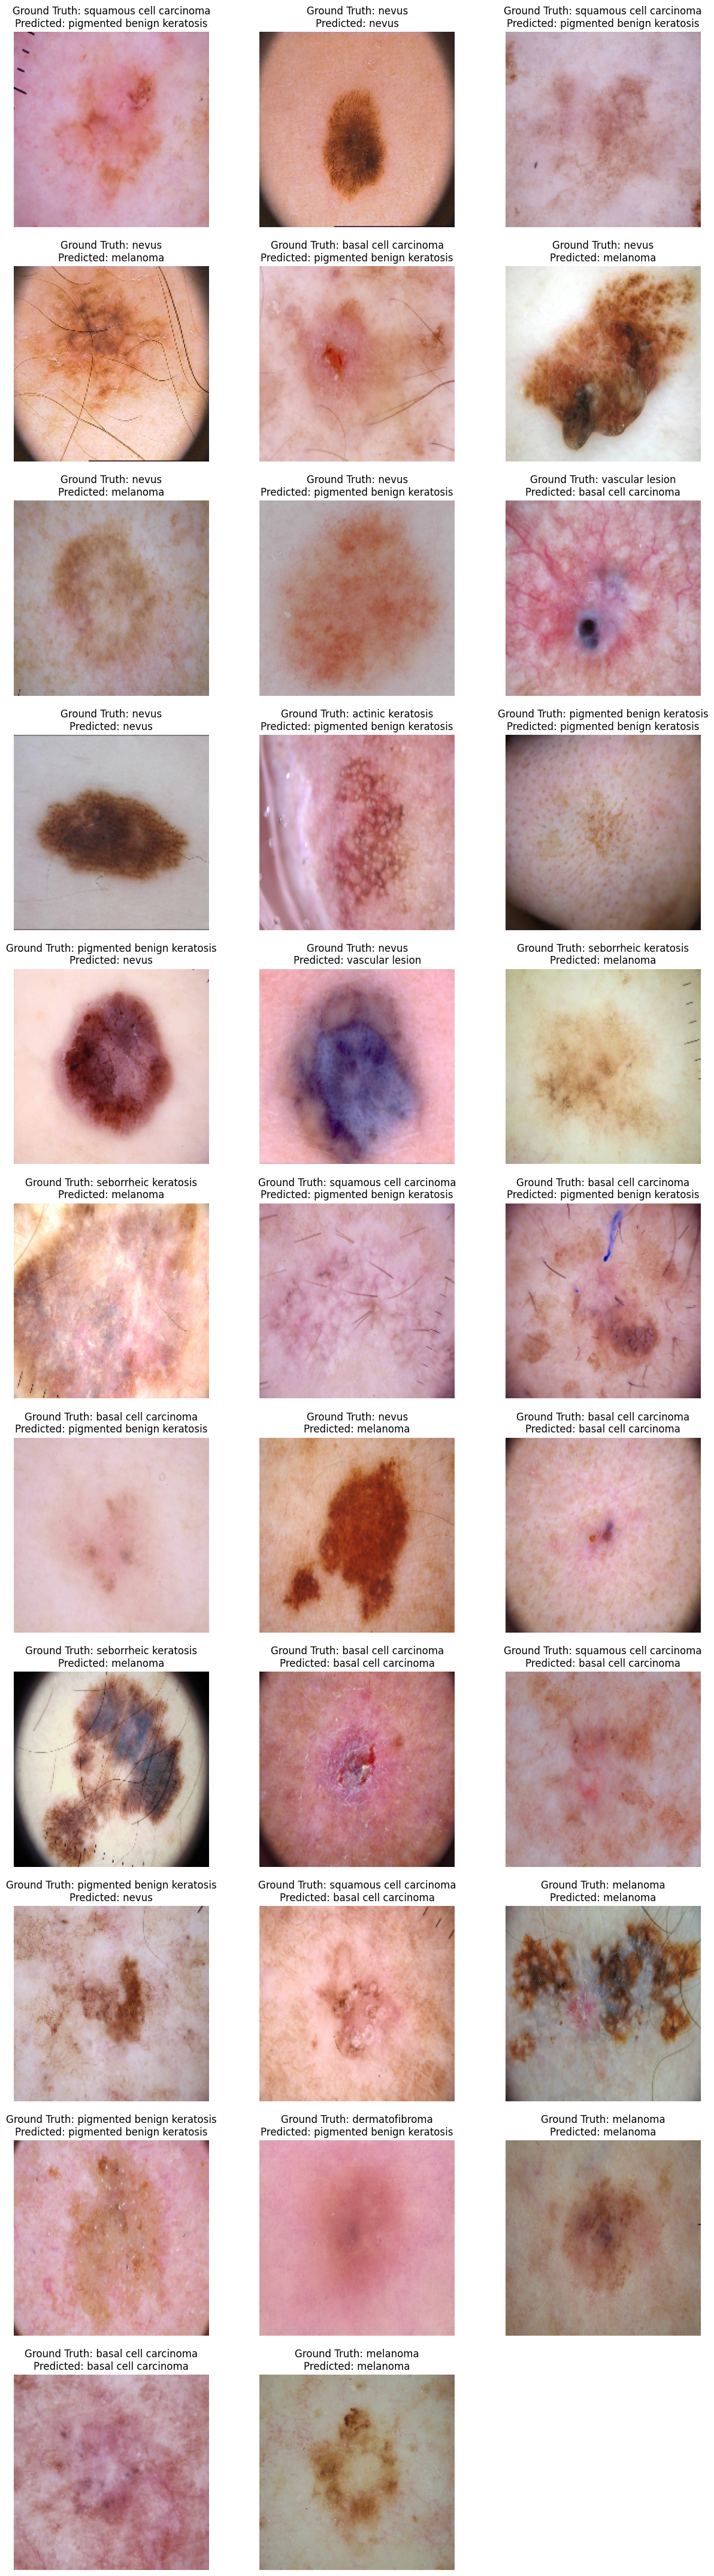

In [56]:

for image_batch, label_batch in test_ds.take(1):
    predictions = model.predict(image_batch)

    num_images = len(image_batch)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = -(-num_images // num_cols)  # Ceiling division to calculate number of rows

    plt.figure(figsize=(15, 5*num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')

        plt.title(f"Ground Truth: {class_names[label_batch[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")

    plt.show()